Saving FlightFare .csv to FlightFare  (1).csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 263082.3750 - mae: 454.5296 - val_loss: 322797.0938 - val_mae: 519.3094
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 281368.3750 - mae: 472.1273 - val_loss: 322072.7188 - val_mae: 518.6229
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 261170.0938 - mae: 451.0107 - val_loss: 321231.5625 - val_mae: 517.8221
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 241861.6719 - mae: 427.9951 - val_loss: 320147.7188 - val_mae: 516.7876
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 270508.7812 - mae: 457.1987 - val_loss: 318718.3125 - val_mae: 515.4213
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 261294.0312 - mae: 449.4171 - val_loss: 316874.1875 - val_mae: 513.6473
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248818.1094 - mae: 434.2264 - val_loss: 314505.5938 - val_mae: 511.3564
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 247034.5312 - mae:

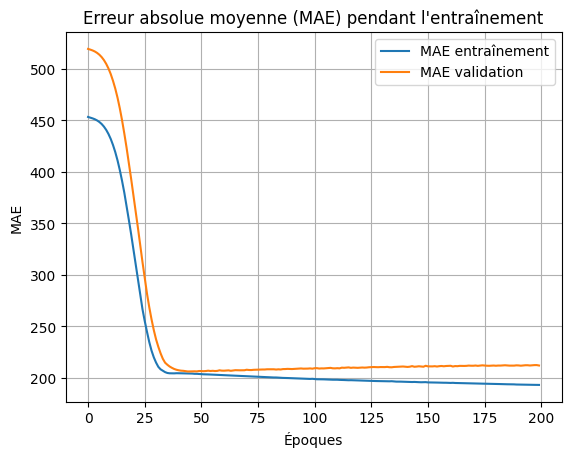

In [ ]:
# Étape 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
# Étape 2 :Chargement et préparation des données
# Importation du fichier CSV depuis ton appareil
uploaded = files.upload()

#  Chargement du fichier (avec le bon nom exact)
data = pd.read_csv('FlightFare .csv')  # Attention à l'espace après "FlightFare"

# Étape 3 : Prétraitement de base
data.dropna(inplace=True)

# Encodage des variables catégorielles
label_encoders = {}
for column in ['Airline', 'Source', 'Destination', 'Total_Stops', 'Season', 'Holiday']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparation des caractéristiques et de la cible
X = data.drop('Price', axis=1)
y = data['Price']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Étape 4: Création du modèle
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Sortie unique pour la régression

# Étape 5 : Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Étape 6 : Entraînement du modèle
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Étape 7 : Évaluation du modèle
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print("Erreur absolue moyenne (MAE) sur le test :", mae)

# Étape 8 : Prédiction sur un échantillon
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
print("Valeur réelle :", y_test.iloc[0], "| Prédiction :", prediction[0][0])

#  Visualisation de l’apprentissage
plt.plot(history.history['mae'], label='MAE entraînement')
plt.plot(history.history['val_mae'], label='MAE validation')
plt.xlabel('Époques')
plt.ylabel('MAE')
plt.title("Erreur absolue moyenne (MAE) pendant l'entraînement")
plt.legend()
plt.grid(True)
plt.show()

